In [41]:
import pandas as pd
import numpy as np

ticket_data = pd.read_csv("data/ticket_data.csv")
cities = pd.read_csv("data/cities.csv")
providers = pd.read_csv("data/providers.csv")
stations = pd.read_csv("data/stations.csv")

#Fusion des données recupérees pour obtenir des infos sur les stations passés pour les tickets
ticket_stations_data = pd.merge(pd.merge(ticket_data, stations, left_on='o_station',right_on='id'),stations, left_on='d_station',right_on="id")

#demande d'un trajet
is_city_exist = True
is_trip_already_exist = True

while is_trip_already_exist:
    while is_city_exist:
        depart = input("De quelle ville partez vous?")
        arrivee = input("Ou allez vous?")
        if not (cities[cities.unique_name == depart].empty or cities[cities.unique_name == arrivee].empty):
            is_city_exist = False
        else:
            print("ville non reconne")

    #Recuperation des id des villes de depart et d'arrivee
    depart_id = int(cities[cities.unique_name == depart].id)
    arrivee_id = int(cities[cities.unique_name == arrivee].id)

    #Recupertion des ticket pour le trajet indiqué
    depart_ticket = ticket_stations_data[ticket_stations_data.o_city == depart_id]
    depart_arrivee_ticket = ticket_stations_data[ticket_stations_data.d_city == arrivee_id]
    if not depart_arrivee_ticket.empty:
        is_trip_already_exist = False
    else:
        print("Ce Trajet n'a jamais été recommandé")

#calcul des durees pour chaque ticket
depart_arrivee_ticket.loc[:,'duration']=pd.to_datetime(depart_arrivee_ticket.arrival_ts)-pd.to_datetime(depart_arrivee_ticket.departure_ts)
depart_arrivee_ticket.loc[:,'duration'] = depart_arrivee_ticket.duration.dt.total_seconds()

depart_arrivee_ticket.rename(columns={'unique_name_x': 'De_la_gare', 'unique_name_y': 'A_la_gare'}, inplace=True)


#Acquisition des statistiques sur les prix et durees
price_agg = depart_arrivee_ticket.groupby(['De_la_gare','A_la_gare']).agg({'price_in_cents':['min','max','mean'],'duration':['min','max','mean']})

print(depart," ---- ",arrivee)
#price_agg.plot()
price_agg

De quelle ville partez vous?paris
Ou allez vous?rennes
paris  ----  rennes


C:\Users\josed\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\josed\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\josed\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.p

price_in_cents  \
                                                                                      min   
De_la_gare                                         A_la_gare                                
Arras (Bus stop on "rue du Docteur Brassart")      Gare routière de Rennes           2390   
Bonneval                                           Gare routière de Rennes           3120   
Gare Bruxelles-Midi                                Gare routière de Rennes           4690   
Gare Routière Internationale de Paris-Gallieni ... Gare routière de Rennes           1000   
Gare SNCF Grenoble                                 Gare routière de Rennes           3800   
Gare SNCF La Rochelle                              Gare routière de Rennes           1200   
Gare de Bercy                                      Gare routière de Rennes           1400   
Gare de Bruxelles-Nord                             Gare routière de Rennes           2500   
Gare de Haluchère-Batignolles                      Gare routière de Rennes           1390   
Gare de Liège-Guillemins                           Gare routière de Rennes           2500   
Gare de Marseille Saint-Charles                    Gare routière de Rennes          16160   
Gare routière Aéroport Nice Terminal 2             Gare routière de Rennes           6090   
Gare routière d'Angers                             Gare routière de Rennes           1000   
La Défense                                         Gare routière de Rennes           1800   
Lisieux                                            Gare routière de Rennes           4240   
Marne-La-Vallée - Chessy - Gare Tgv et OuiGo (À... Gare routière de Rennes           3400   
Massy-Palaiseau                                    Gare routière de Rennes           1800   
Montpellier                                        Gare routière de Rennes          11900   
Nantes Halluchère - Route de Paris                 Gare routière de Rennes           1300   
Nice Ville                                         Gare routière de Rennes          17300   
Paris Ibis Clichy Batignolles                      Gare routière de Rennes           1800   
Paris Montparnasse 1 Et 2                          Gare routière de Rennes           4330   
Paris Montparnasse 3 Vaugirard                     Gare routière de Rennes           5330   
Paris Nord - St-Denis université                   Gare routière de Rennes           1800   
Parking Château Descas                             Gare routière de Rennes           1890   
Parking Circé                                      Gare routière de Rennes           3000   
Parking Relais Parnasse                            Gare routière de Rennes           3700   
Soissons                                           Gare routière de Rennes           2860   
Station Les Sabines                                Gare routière de Rennes           3100   
Zaventem Airport                                   Gare routière de Rennes           5180   

                                                                                   \
                                                                              max   
De_la_gare                                         A_la_gare                        
Arras (Bus stop on "rue du Docteur Brassart")      Gare routière de Rennes  12000   
Bonneval                                           Gare routière de Rennes  11120   
Gare Bruxelles-Midi                                Gare routière de Rennes   4690   
Gare Routière Internationale de Paris-Gallieni ... Gare routière de Rennes   2990   
Gare SNCF Grenoble                                 Gare routière de Rennes  17650   
Gare SNCF La Rochelle                              Gare routière de Rennes   1690   
Gare de Bercy                                      Gare routière de Rennes   3390   
Gare de Bruxelles-Nord                             Gare routière de Rennes   5180   
Gare de Haluchère-Batignolles                      Gare routière de Re

Tapez 
1...........0-200Km
2...........201-800km
3...........800-2000km
4...........2000+km
Quel est votre choix?3
Entre 800 et 2000km


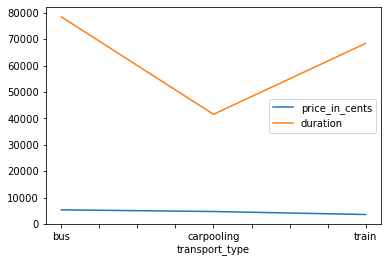

In [42]:
import pandas as pd
import numpy as np
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
def Distance(lat1,lon1,lat2,lon2):
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c



ticket_data = pd.read_csv("data/ticket_data.csv")
cities = pd.read_csv("data/cities.csv")
providers = pd.read_csv("data/providers.csv")
stations = pd.read_csv("data/stations.csv")

#Fusion pour obtenir des infos sur companies, les stations, et les villes
ticket_stations_data = pd.merge(pd.merge(ticket_data, stations, left_on='o_station',right_on='id'),stations, left_on='d_station',right_on="id")

#calculer distance entre station et supression des champs inutiles
ticket_stations_data['distance_station'] = ticket_stations_data.apply(lambda row: Distance(row['longitude_x'], row['latitude_x'], row['longitude_y'], row['latitude_y']), axis=1)
ticket_stations_data.drop(['longitude_x', 'longitude_y', 'latitude_x', 'latitude_y'], axis='columns', inplace=True)

ticket_stations_cities_data = pd.merge(pd.merge(ticket_stations_data,cities,left_on='o_city',right_on='id'),cities,left_on='d_city',right_on="id")
#calculer distance entre villes et supression des champs inutiles
ticket_stations_cities_data['distance_ville'] = ticket_stations_cities_data.apply(lambda row: Distance(row['longitude_x'], row['latitude_x'], row['longitude_y'], row['latitude_y']), axis=1)
ticket_stations_cities_data.drop(['longitude_x', 'longitude_y', 'latitude_x', 'latitude_y'], axis='columns', inplace=True)

ticket_stations_cities_provider_data = pd.merge(ticket_stations_cities_data,providers,left_on='company',right_on='company_id')



#Demande de la distance pour laquelle faire des stat
is_choice = True
print("Tapez \n1...........0-200Km\n2...........201-800km\n3...........800-2000km\n4...........2000+km")
while is_choice:
    tranche_distance =int(input("Quel est votre choix?"))
    if (tranche_distance<5 and tranche_distance>1):
        is_choice = False
    else:
        print("choix non disponible")

#filtrage des tickets correspondant à la distance demandée
maxi = 0
mini = 0
distance=""
if tranche_distance ==1:
    distance = "Entre 0 et 200km"
    mini = 0
    maxi = 200
if tranche_distance ==2:
    distance = "Entre 200 et 800km"
    mini = 200
    maxi = 800
if tranche_distance ==3:
    distance = "Entre 800 et 2000km"
    mini = 800
    maxi = 2000
if tranche_distance ==4:
    distance = "Plus de 2000km"
    mini = 2000
    maxi = float('inf')

result = ticket_stations_cities_provider_data[ticket_stations_cities_provider_data.distance_ville <= maxi]
result = result[result.distance_ville >= mini]

#calcul des durees pour chaque ticket
result.loc[:,'duration']=pd.to_datetime(result.arrival_ts)-pd.to_datetime(result.departure_ts)
result.loc[:,'duration'] = result.duration.dt.total_seconds()


#Acquisition des statistiques
result_agg = result.groupby('transport_type').agg({'price_in_cents':'mean','duration':'mean'})

print(distance)
result_agg.plot()
#result_agg

